<a href="https://colab.research.google.com/github/hanan99/House-pricing/blob/main/House%20pricing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_columns', 50)
path = 'Dataset/'

In [ ]:
data = pd.read_csv(path+'immo_data.csv')
print(data.shape)
display(data.info())
display(data.head())
display(data.describe())

(268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052

None

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [ ]:

null_data = data.isnull().sum().sort_values(ascending = False)
null_data = null_data[null_data>0]
null_data

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructedRange         57045
yearConstructed              57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
dtype: int64

In [ ]:
drop_features = null_data[null_data > data.shape[0] * 0.7]
print(drop_features)
data = data.drop(drop_features.index, axis=1)

text_features = ['description', 'facilities', 'streetPlain']
data[text_features] = data[text_features].fillna(' ')

telekomHybridUploadSpeed    223830
electricityBasePrice        222004
electricityKwhPrice         222004
energyEfficiencyClass       191063
dtype: int64


In [ ]:
fill_zero = ['noParkSpaces']
fill_average = ['heatingCosts', 'thermalChar', 'yearConstructedRange', 'totalRent','telekomUploadSpeed', 'serviceCharge', 'pricetrend', 'yearConstructed']
fill_one_feature = ['numberOfFloors', 'floor']

data[fill_zero] = data[fill_zero].fillna(0)
data[fill_average] = data[fill_average].fillna(data[fill_average].mean())
data[fill_one_feature] = data[fill_one_feature].fillna(1)



In [ ]:
data.loc[data.lastRefurbish.isna(), 'lastRefurbish'] = data[data.lastRefurbish.isna()].yearConstructed

data = data.drop('houseNumber', axis=1)


fill_with_model = ['petsAllowed', 'interiorQual', 'condition', 'firingTypes', 'heatingType', 'typeOfFlat', 'telekomTvOffer']
train_features = [item for item in data.columns if item not in fill_with_model + ['livingSpace', 'street', 'scoutId', 'description',
                                                                                  'facilities', 'date', 'streetPlain']]



In [ ]:
null_data = data.isnull().sum().sort_values(ascending = False)
null_data = null_data[null_data>0]
print(null_data)

petsAllowed       114573
interiorQual      112665
condition          68489
firingTypes        56964
heatingType        44856
typeOfFlat         36614
telekomTvOffer     32619
dtype: int64


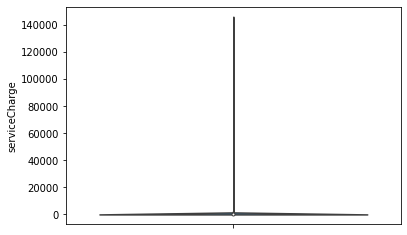

serviceCharge


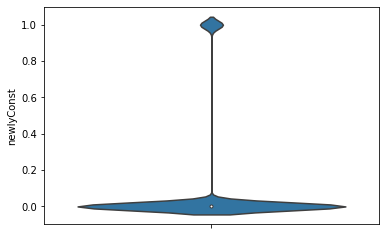

newlyConst


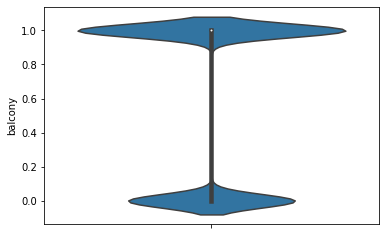

balcony


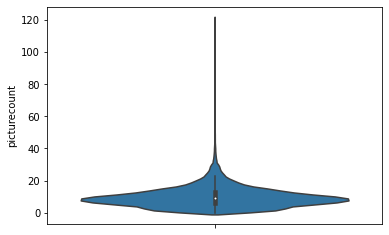

picturecount


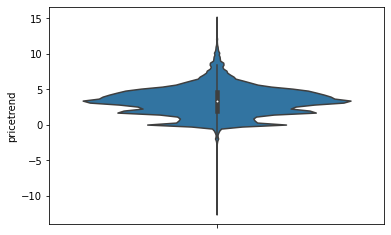

pricetrend


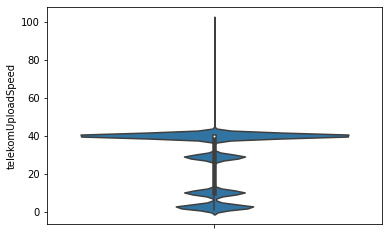

telekomUploadSpeed


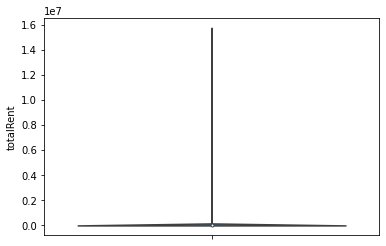

totalRent


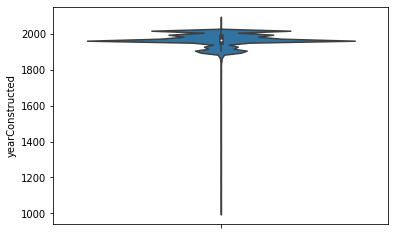

yearConstructed


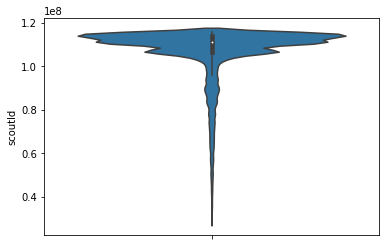

scoutId


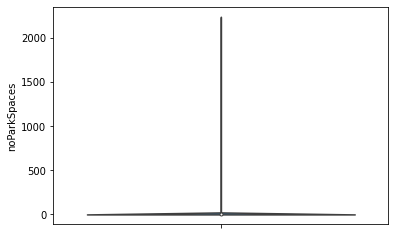

noParkSpaces


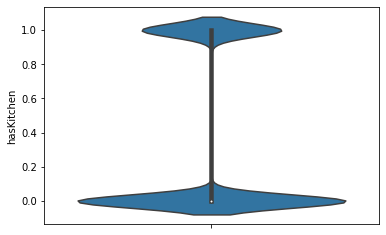

hasKitchen


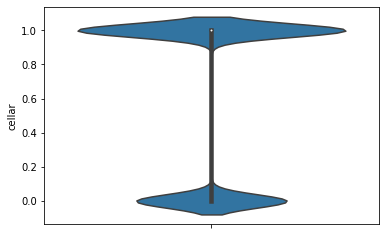

cellar


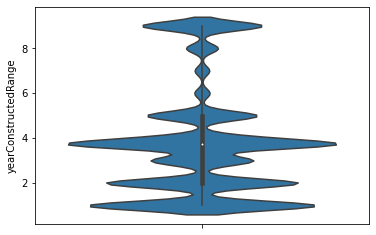

yearConstructedRange


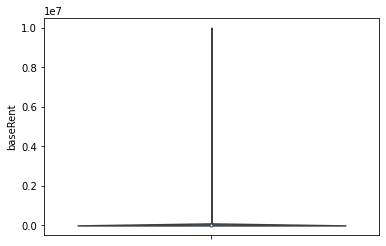

baseRent


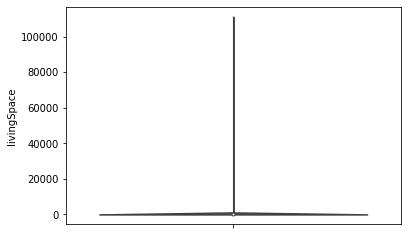

livingSpace


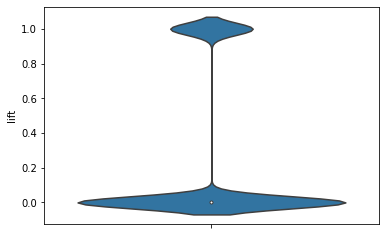

lift


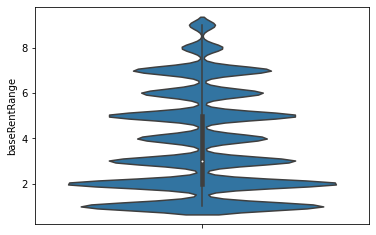

baseRentRange


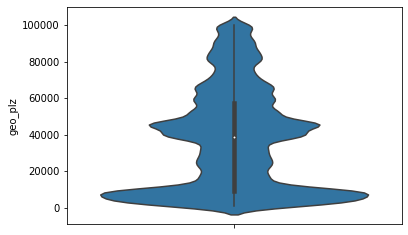

geo_plz


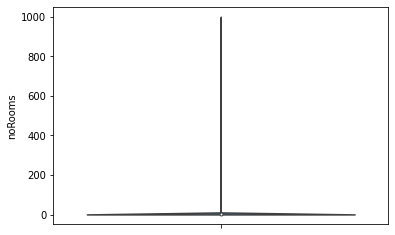

noRooms


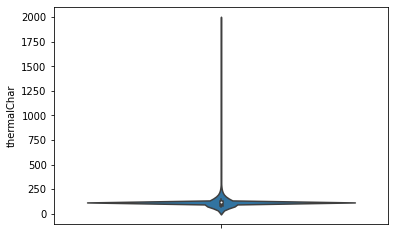

thermalChar


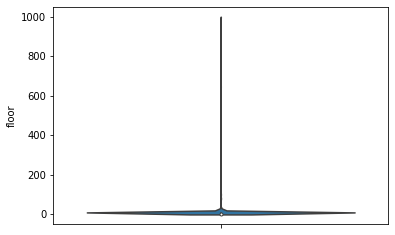

floor


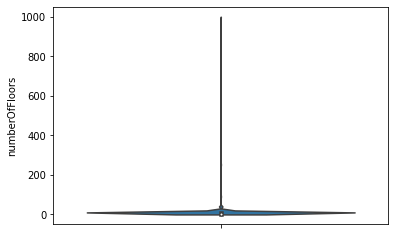

numberOfFloors


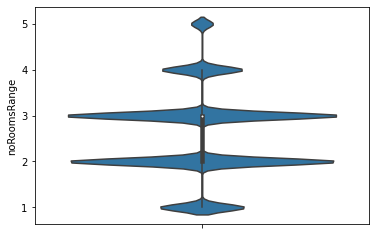

noRoomsRange


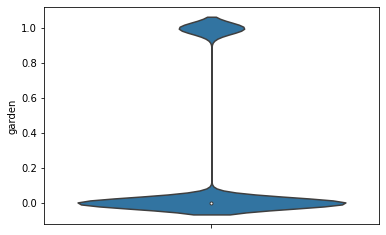

garden


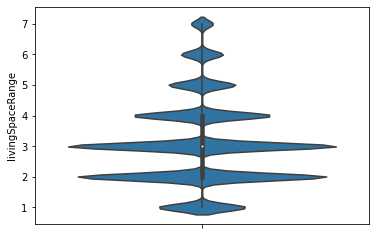

livingSpaceRange


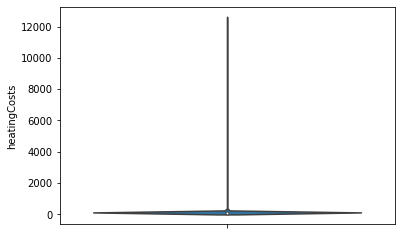

heatingCosts


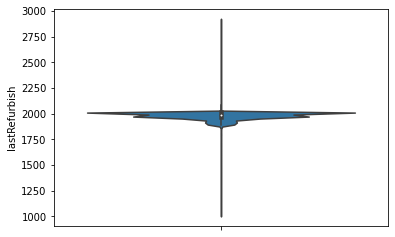

lastRefurbish


In [ ]:
for i in data.columns:
    try:
        sns.violinplot(y = data[i])
        plt.show()
        print(i)
    except:
        pass

In [ ]:
first_quartile =[]
third_quartile=[]
removal_features = ['serviceCharge','totalRent','yearConstructed','noParkSpaces','baseRent','livingSpace','noRooms','thermalChar','floor','numberOfFloors','heatingCosts','lastRefurbish']
for feat in removal_features:
    first_quartile.append(data[feat].quantile(.05))
    third_quartile.append(data[feat].quantile(.95))

Interquartile_range = data.copy()
for i in range(len(removal_features)):
    feat = removal_features[i]
    mask = Interquartile_range[feat].between(first_quartile[i], third_quartile[i], inclusive=True)
    before = Interquartile_range.shape[0]
    Interquartile_range = Interquartile_range.loc[mask]
    print('{} : {} -> {}'.format(feat, before, Interquartile_range.shape[0]))

serviceCharge : 268850 -> 247494
totalRent : 247494 -> 230209
yearConstructed : 230209 -> 213178
noParkSpaces : 213178 -> 206807
baseRent : 206807 -> 203218
livingSpace : 203218 -> 193393
noRooms : 193393 -> 190399
thermalChar : 190399 -> 173655
floor : 173655 -> 169881
numberOfFloors : 169881 -> 163308
heatingCosts : 163308 -> 150862
lastRefurbish : 150862 -> 142797


In [ ]:
for i in Interquartile_range.columns:
    try:
        sns.violinplot(y = iqr[i])
        plt.show()
        print(i)
    except:
        pass

In [ ]:
data = Interquartile_range.copy()

data.date.unique()

array(['May19', 'Feb20', 'Oct19', 'Sep18'], dtype=object)

In [ ]:
label_encoding = ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden', 'date']
for feat in label_encoding:
    labelEnc = preprocessing.LabelEncoder()
    labelEnc.fit(data[feat])
    data[feat] = labelEnc.transform(data[feat])

In [ ]:
one_hot_features = ['regio1', 'heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'geo_krs', 'condition',
                    'interiorQual', 'petsAllowed', 'street', 'streetPlain', 'typeOfFlat','regio2','regio3']
for feat in one_hot_features:
    print(feat,'\t\t',len(data[feat].unique()))

regio1 		 16
heatingType 		 14
telekomTvOffer 		 4
firingTypes 		 86
geo_bln 		 16
geo_krs 		 419
condition 		 11
interiorQual 		 5
petsAllowed 		 4
street 		 35339
streetPlain 		 36538
typeOfFlat 		 11
regio2 		 419
regio3 		 7516


In [ ]:
drop_features = ['street', 'streetPlain', 'regio1', 'regio2', 'regio3']
data = data.drop(drop_features, axis=1)



In [ ]:
data = data.drop(['description','facilities'], axis = 1)

In [ ]:
one_hot_features = ['heatingType', 'telekomTvOffer', 'firingTypes', 'geo_bln', 'geo_krs', 'condition',
                    'interiorQual', 'petsAllowed', 'typeOfFlat']
df = data.copy()
for feat in one_hot_features:
    one_hot = pd.get_dummies(df[feat])
    df = df.drop(feat, axis = 1)
    df = df.join(one_hot,rsuffix='_r')
df.head()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,...,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,refurbished,ripe_for_demolition,well_kept,luxury,normal,simple,sophisticated,negotiable_r,no,yes,apartment,ground_floor,half_basement,loft,maisonette,other,penthouse,raised_ground_floor,roof_storey,terraced_flat
0,245.00,0,0,6,4.62,10.0,840.000000,1965.00000,96107057,1.0,0,1,2.000000,595.0,86.00,0,4,44269,4.0,181.400000,1.0,3.0,4,1,4,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,58.15,0,1,9,1.53,40.0,901.331522,1964.00000,108890903,0.0,0,0,2.000000,343.0,58.15,0,2,9599,3.0,86.000000,3.0,1.0,3,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,142.00,0,1,5,4.48,2.4,901.331522,1999.00000,115531145,0.0,1,0,5.000000,315.2,53.43,0,2,24891,2.0,165.000000,1.0,1.0,2,0,2,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6,70.00,0,0,9,1.01,2.4,380.000000,1966.40059,114391930,0.0,0,1,3.714544,310.0,62.00,0,2,9599,2.0,114.749533,1.0,4.0,2,1,3,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,110.00,0,0,5,3.77,40.0,690.000000,1970.00000,106416361,1.0,1,1,2.000000,580.0,53.00,0,4,79211,2.0,138.000000,2.0,2.0,2,0,2,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


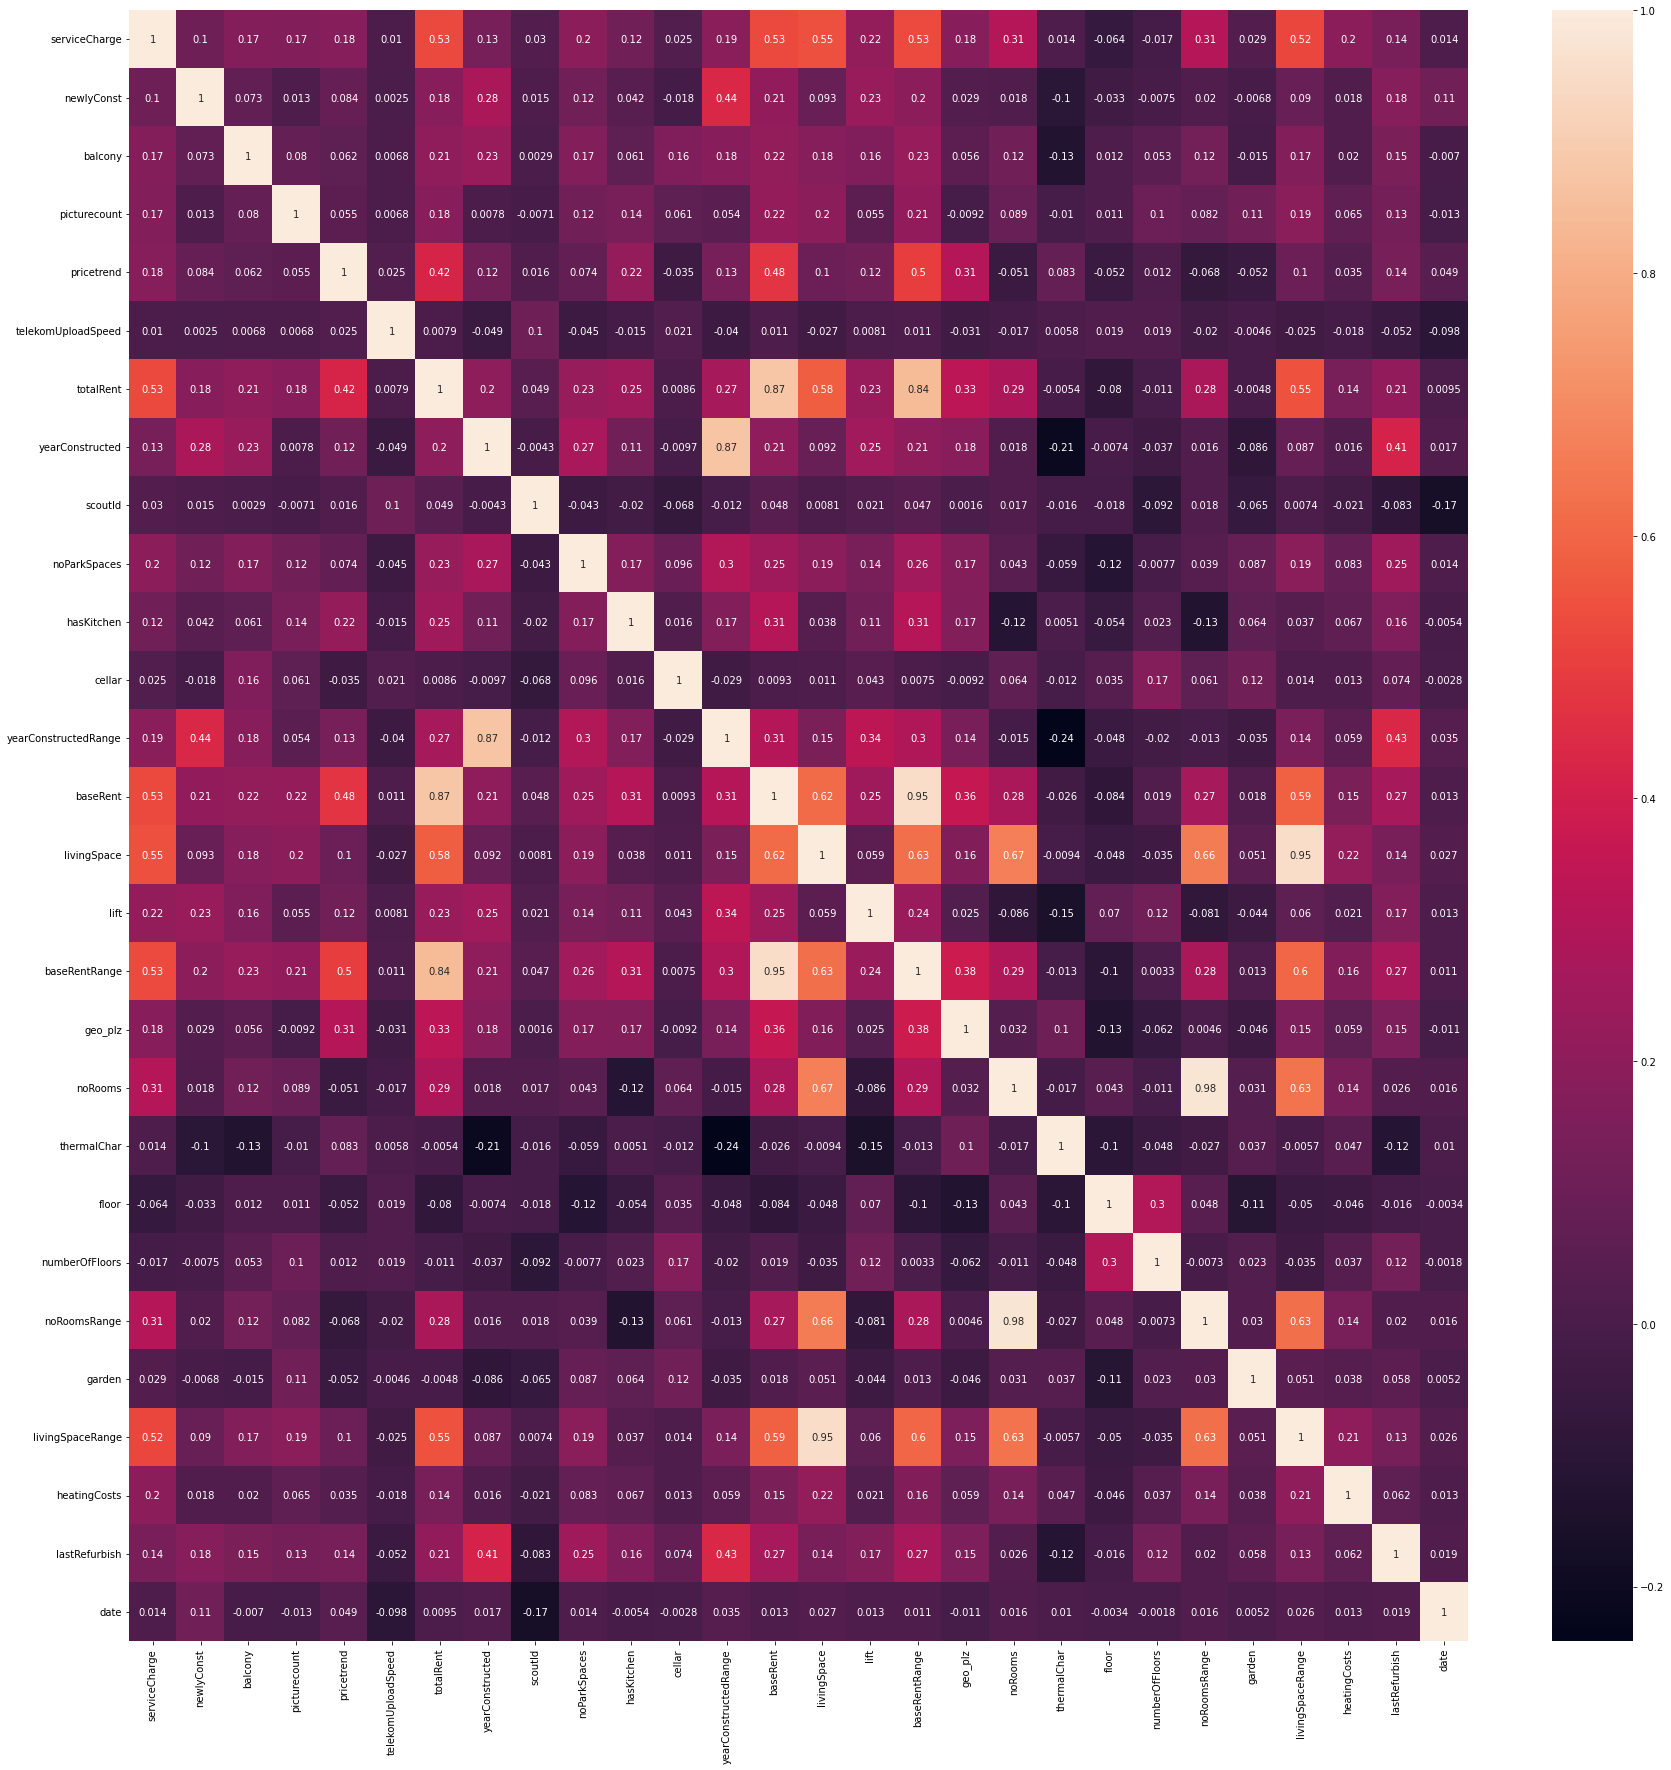

livingSpace             1.000000
livingSpaceRange        0.953983
noRooms                 0.668460
noRoomsRange            0.658352
baseRentRange           0.625771
baseRent                0.615193
totalRent               0.578967
serviceCharge           0.546050
heatingCosts            0.217411
picturecount            0.195358
noParkSpaces            0.193119
balcony                 0.179437
geo_plz                 0.163061
yearConstructedRange    0.149485
lastRefurbish           0.139621
pricetrend              0.102046
newlyConst              0.092899
yearConstructed         0.092301
lift                    0.059042
garden                  0.050801
hasKitchen              0.038414
date                    0.027402
cellar                  0.011291
scoutId                 0.008148
thermalChar            -0.009412
telekomUploadSpeed     -0.026983
numberOfFloors         -0.034676
floor                  -0.047704
Name: livingSpace, dtype: float64


In [ ]:
plt.figure(figsize=(30,30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig(path+'corr.jpg')
plt.show()
print(corrMatrix['livingSpace'].sort_values(ascending=False))

In [ ]:
data.head()

,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,lastRefurbish,date
0,245.00,central_heating,ONE_YEAR_FREE,0,0,6,4.62,10.0,840.000000,1965.00000,96107057,1.0,oil,0,Nordrhein_Westfalen,1,2.000000,595.0,86.00,Dortmund,well_kept,normal,NaN,0,4,ground_floor,44269,4.0,181.400000,1.0,3.0,4,1,4,76.990866,1965.00000,1
3,58.15,district_heating,ONE_YEAR_FREE,0,1,9,1.53,40.0,901.331522,1964.00000,108890903,0.0,district_heating,0,Sachsen,0,2.000000,343.0,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,0,2,other,9599,3.0,86.000000,3.0,1.0,3,0,2,87.230000,1964.00000,1
5,142.00,gas_heating,NONE,0,1,5,4.48,2.4,901.331522,1999.00000,115531145,0.0,gas,1,Schleswig_Holstein,0,5.000000,315.2,53.43,Schleswig_Flensburg_Kreis,well_kept,NaN,no,0,2,apartment,24891,2.0,165.000000,1.0,1.0,2,0,2,76.990866,1999.00000,0
6,70.00,self_contained_central_heating,ONE_YEAR_FREE,0,0,9,1.01,2.4,380.000000,1966.40059,114391930,0.0,NaN,0,Sachsen,1,3.714544,310.0,62.00,Mittelsachsen_Kreis,fully_renovated,NaN,NaN,0,2,NaN,9599,2.0,114.749533,1.0,4.0,2,1,3,76.990866,1966.40059,0
8,110.00,oil_heating,ONE_YEAR_FREE,0,0,5,3.77,40.0,690.000000,1970.00000,106416361,1.0,oil,1,Baden_Württemberg,1,2.000000,580.0,53.00,Emmendingen_Kreis,well_kept,sophisticated,no,0,4,roof_storey,79211,2.0,138.000000,2.0,2.0,2,0,2,76.990866,1970.00000,0


**Hypothesis 1**
InteriorQual VS LivingSpace

['normal' nan 'sophisticated' 'simple' 'luxury']


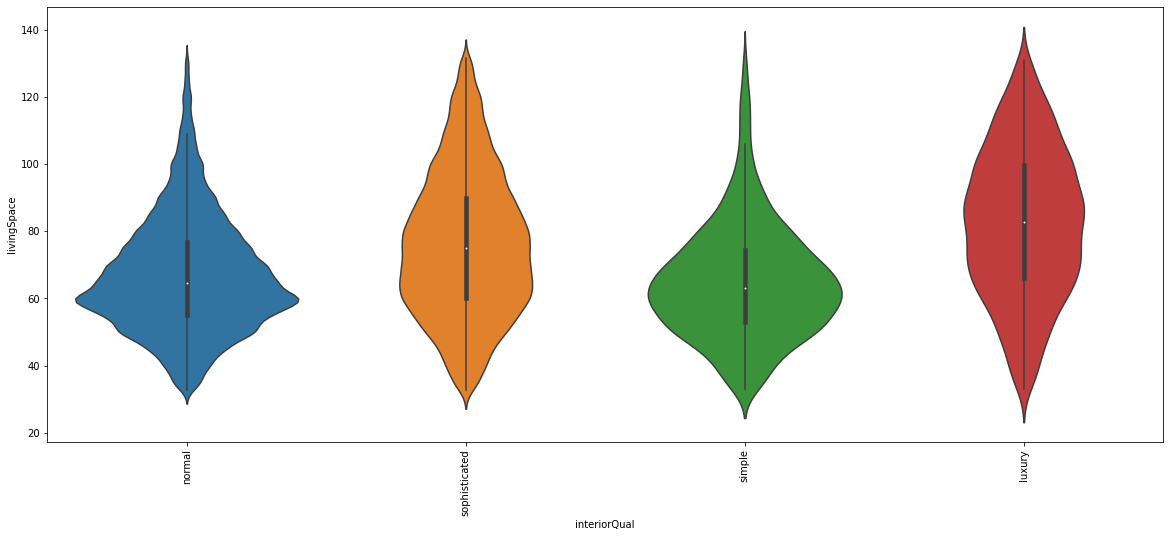

In [ ]:
feat = 'interiorQual'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [ ]:
a1 = data[data[feat] == 'normal'].livingSpace.values
a2 = data[data[feat] == 'sophisticated'].livingSpace.values
a3 = data[data[feat] == 'simple'].livingSpace.values
a4 = data[data[feat] == 'luxury'].livingSpace.values
stats.f_oneway(a1,a2,a3,a4)

F_onewayResult(statistic=1728.8491775733921, pvalue=0.0)

**Hypothesis 2**
TelekomTvOffer VS LivingSpace

['ONE_YEAR_FREE' 'NONE' nan 'ON_DEMAND']


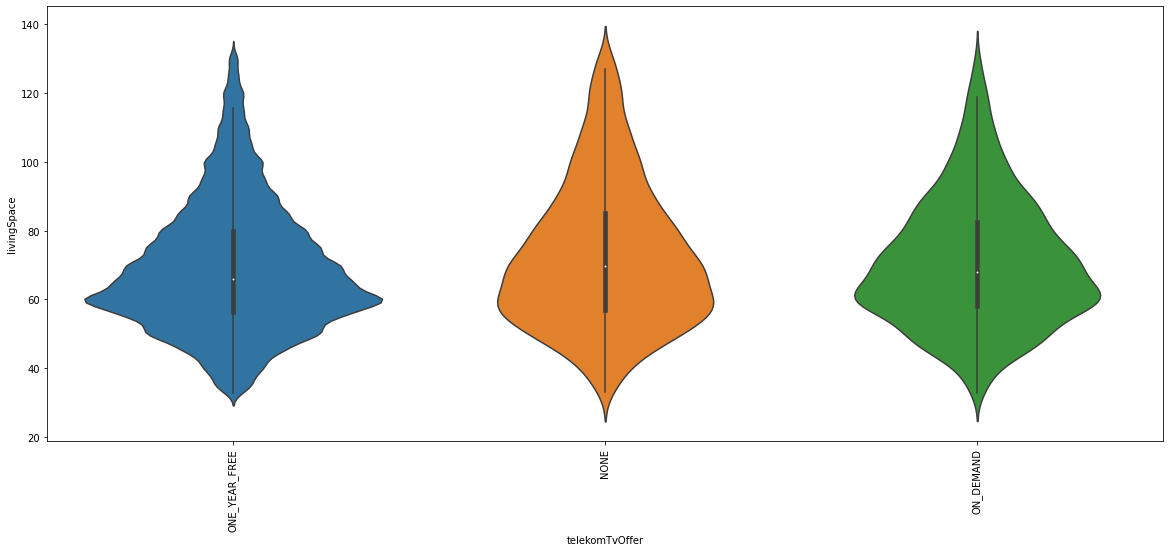

In [ ]:
feat = 'telekomTvOffer'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [ ]:
a1 = data[data[feat] == 'ONE_YEAR_FREE'].livingSpace.values
a2 = data[data[feat] == 'NONE'].livingSpace.values
a3 = data[data[feat] == 'ON_DEMAND'].livingSpace.values
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=63.12885869479682, pvalue=3.9518232994879255e-28)

**Hypothesis 4** TypeOfFlat VS LivingSpace

['ground_floor' 'other' 'apartment' nan 'roof_storey'
 'raised_ground_floor' 'half_basement' 'maisonette' 'terraced_flat' 'loft'
 'penthouse']


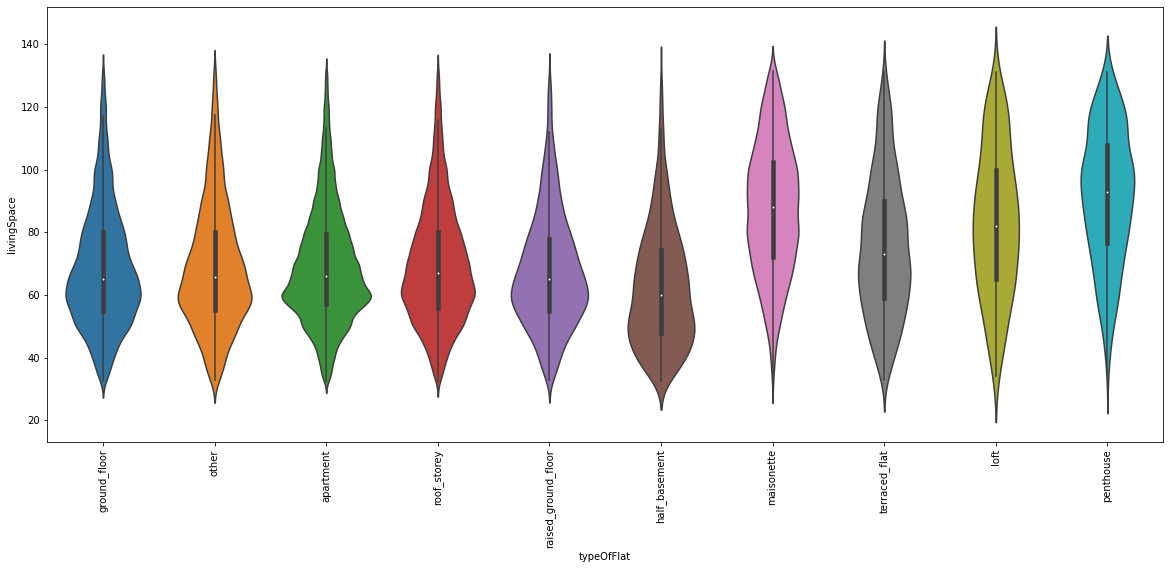

In [ ]:
feat = 'typeOfFlat'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [ ]:
a1 = data[data[feat] == 'ground_floor'].livingSpace.values
a2 = data[data[feat] == 'other'].livingSpace.values
a3 = data[data[feat] == 'apartment'].livingSpace.values
a4 = data[data[feat] == 'maisonette'].livingSpace.values
a5 = data[data[feat] == 'roof_storey'].livingSpace.values
a6 = data[data[feat] == 'raised_ground_floor'].livingSpace.values
a7 = data[data[feat] == 'half_basement'].livingSpace.values
a8 = data[data[feat] == 'terraced_flat'].livingSpace.values
a9 = data[data[feat] == 'loft'].livingSpace.values
a10 = data[data[feat] == 'penthouse'].livingSpace.values
stats.f_oneway(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10)

F_onewayResult(statistic=590.184413181117, pvalue=0.0)

**Hypothesis 5** geo_bln VS LivingSpace

['Nordrhein_Westfalen' 'Sachsen' 'Schleswig_Holstein' 'Baden_Württemberg'
 'Rheinland_Pfalz' 'Hessen' 'Hamburg' 'Mecklenburg_Vorpommern' 'Bayern'
 'Niedersachsen' 'Sachsen_Anhalt' 'Bremen' 'Berlin' 'Thüringen'
 'Brandenburg' 'Saarland']


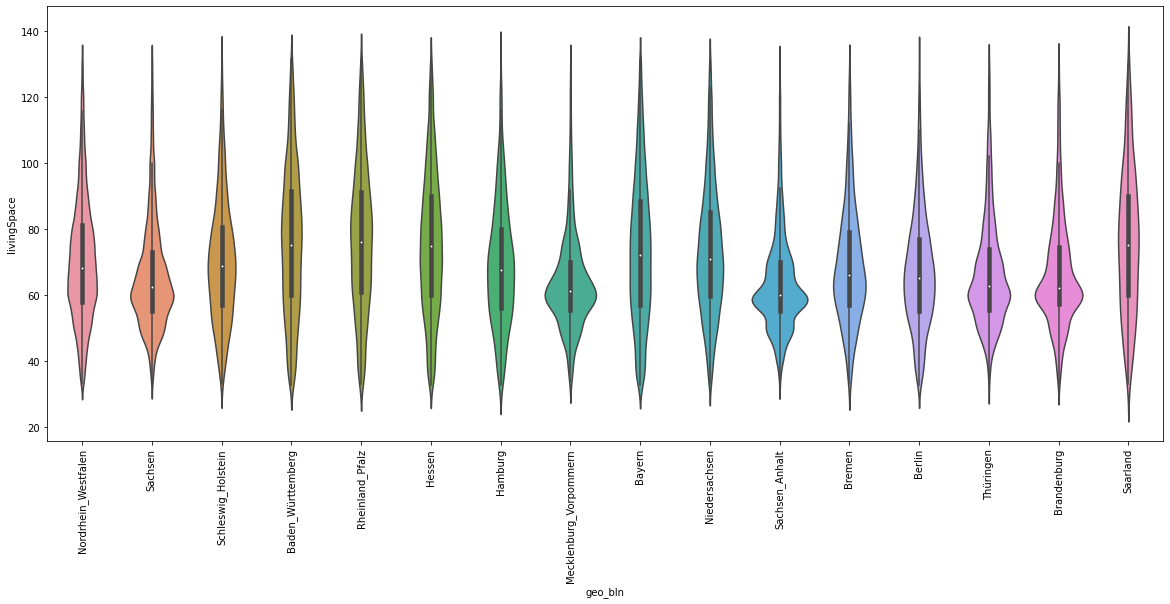

In [ ]:
feat = 'geo_bln'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [ ]:
a1 = data[data[feat] == 'Nordrhein_Westfalen'].livingSpace.values
a2 = data[data[feat] == 'Sachsen'].livingSpace.values
a3 = data[data[feat] == 'Schleswig_Holstein'].livingSpace.values
a4 = data[data[feat] == 'Baden_Württemberg'].livingSpace.values
a5 = data[data[feat] == 'Rheinland_Pfalz'].livingSpace.values
a6 = data[data[feat] == 'Hessen'].livingSpace.values
a7 = data[data[feat] == 'Hamburg'].livingSpace.values
a8 = data[data[feat] == 'Mecklenburg_Vorpommern'].livingSpace.values
a9 = data[data[feat] == 'Bayern'].livingSpace.values
a10 = data[data[feat] == 'Niedersachsen'].livingSpace.values
a11 = data[data[feat] == 'Sachsen_Anhalt'].livingSpace.values
a12 = data[data[feat] == 'Bremen'].livingSpace.values
a13 = data[data[feat] == 'Berlin'].livingSpace.values
a14 = data[data[feat] == 'Thüringen'].livingSpace.values
a15 = data[data[feat] == 'Brandenburg'].livingSpace.values
a16 = data[data[feat] == 'Saarland'].livingSpace.values
stats.f_oneway(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16)

F_onewayResult(statistic=462.18284356789746, pvalue=0.0)

In [ ]:
stats.f_oneway(a13,a14,a15)

F_onewayResult(statistic=1.4698083246647065, pvalue=0.23001007721429811)

**Hypothesis 3**  PetsAllowed VS LivingSpace

[nan 'no' 'negotiable' 'yes']


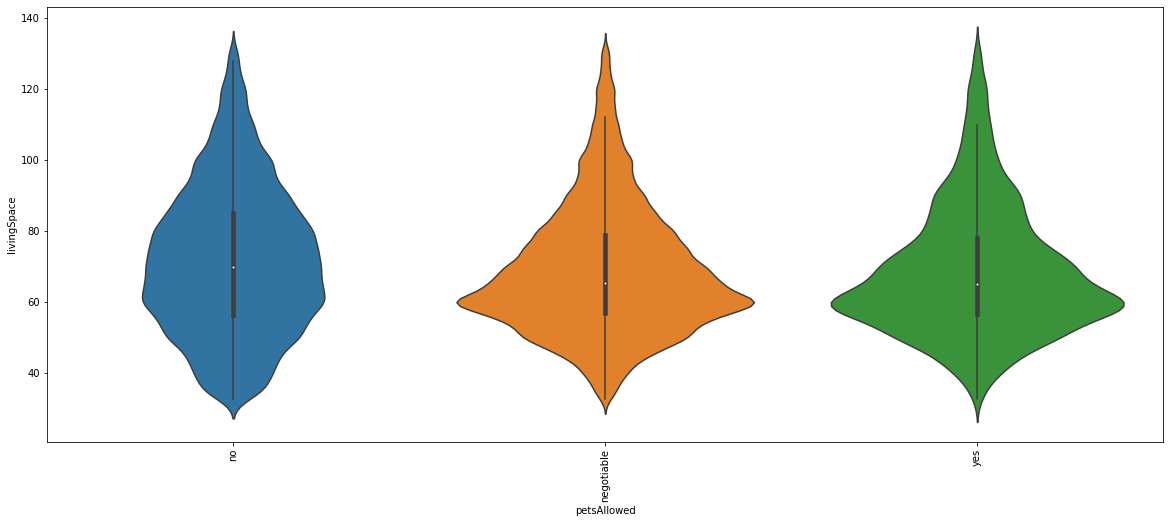

In [ ]:
feat = 'petsAllowed'
plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.violinplot(x=feat, y='livingSpace', data=data)
plt.savefig(path+feat+'.jpg', bbox_inches = 'tight')
print(data[feat].unique())

In [ ]:
a1 = data[data[feat] == 'negotiable'].livingSpace.values
a2 = data[data[feat] == 'no'].livingSpace.values
a3 = data[data[feat] == 'yes'].livingSpace.values
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=212.4329512397686, pvalue=9.48989809493739e-93)

# **Exer2-part1**

In [ ]:
df.to_csv(path+'one_hot.csv', index = None)
df = pd.read_csv(path+'one_hot.csv')

Model

In [ ]:
def reg_report(true, pred, name='Test'):
    print("\n{} Results :\n".format(name))
    print("R Squared :",1-(sum((pred-true)**2)/sum((true-true.mean())**2)))
    print("MSE :",((pred-true)**2).mean())
    print('Accuracy with 10% :', ((pred<=true*1.1) & (true*0.9<=pred)).mean())

def accuracy_with_percentage(clf, X, y):
    pred = clf.predict(X)
    return ((pred<=y*1.1) & (y*0.9<=pred)).mean()

data = pd.read_csv(path+'one_hot.csv')
x = data.drop(['Berlin_r', 'Hamburg_r',  'livingSpace'], axis = 1)
y = data['livingSpace']
print(x.shape)

(142797, 588)


In [ ]:
corrMatrix = data.corr()
corr = corrMatrix['livingSpace'].sort_values(ascending=False)
corr

livingSpace           1.000000
livingSpaceRange      0.953983
noRooms               0.668460
noRoomsRange          0.658352
baseRentRange         0.625771
                        ...   
district_heating     -0.070546
normal               -0.090616
Sachsen_Anhalt       -0.096176
district_heating_r   -0.099373
Sachsen              -0.107303
Name: livingSpace, Length: 591, dtype: float64

K-fold

In [ ]:
scoring={'MSE': 'neg_mean_squared_error', 'Accuracy': accuracy_with_percentage}
def prep_result(temp, model = '', dataset = ''):
    n_temp = {}
    n_temp['model'] = model
    n_temp['dataset'] = dataset
    for key, value in temp.items():
        if 'time' in key:
            n_temp['{}_mean'.format(key)] = value.mean()
            n_temp['{}_variance'.format(key)] = value.var()
            continue
        if 'MSE' in key:
            value = -value
        n_temp['{}_mean'.format(key.split('_')[1])] = value.mean()
        n_temp['{}_variance'.format(key.split('_')[1])] = value.var()
    for key, value in temp.items():
        if 'time' in key:
            continue
        if 'MSE' in key:
            value = -value
        for i in range(len(value)):
            n_temp['{}_fold_{}'.format(key.split('_')[1], i+1)] = value[i]
    return n_temp

scratch regression

In [ ]:
class My_LinearRegression(BaseEstimator):
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, x_ax, y_ax):
        x_ax = np.c_[np.ones(len(x_ax)),x_ax]
        y_ax = y_ax.values

        x_transpose = x_ax.transpose()
        inversed = np.linalg.inv( x_transpose.dot(x_ax) )
        betas = inversed.dot( x_transpose ).dot(y_ax)

        self.intercept = betas[0]
        self.coefficients = betas[1:]

    def predict(self, x):
        return np.multiply(x, self.coefficients).sum(axis = 1) + self.intercept

Tests

In [ ]:
def experiment(cv = 5):
    results = []

    temp = cross_validate(My_LinearRegression(), x['livingSpaceRange'].values.reshape(1, -1).T, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'my linear regression', 'most correlation'))

    temp = cross_validate(LinearRegression(), x['livingSpaceRange'].values.reshape(1, -1).T, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'linear regression', 'most correlation'))

    temp = cross_validate(LinearRegression(), x[['livingSpaceRange', 'noRooms', 'Sachsen', 'normal']], y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'linear regression', 'top 2 & tail 2 correlation'))

    temp = cross_validate(LinearRegression(), x, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'linear regression', 'all features'))

    temp = cross_validate(Lasso(), x, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'lasso', 'all features'))

    temp = cross_validate(Ridge(), x, y, cv=cv, scoring=scoring)
    results.append(prep_result(temp, 'ridge', 'all features'))

    return pd.DataFrame(results)

In [ ]:
%%time
fold = experiment(cv = 5)
display(fold)
fold.to_csv(path+'reuslt_cv_5.csv', index = False)

fold = experiment(cv = 10)
display(fold)
fold.to_csv(path+'reuslt_cv_10.csv', index = False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.78352e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.76692e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.76923e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.74839e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

,model,dataset,fit_time_mean,fit_time_variance,score_time_mean,score_time_variance,MSE_mean,MSE_variance,Accuracy_mean,Accuracy_variance,MSE_fold_1,MSE_fold_2,MSE_fold_3,MSE_fold_4,MSE_fold_5,Accuracy_fold_1,Accuracy_fold_2,Accuracy_fold_3,Accuracy_fold_4,Accuracy_fold_5
0,my linear regression,most correlation,0.009421,0.000006,0.004772,1.728009e-06,31.472794,2.465862e-02,0.706759,0.000015,31.537506,31.357148,31.561019,31.233636,31.674663,0.701996,0.711239,0.702686,0.710529,0.707343
1,linear regression,most correlation,0.011770,0.000020,0.004124,1.572942e-08,31.472794,2.465862e-02,0.706759,0.000015,31.537506,31.357148,31.561019,31.233636,31.674663,0.701996,0.711239,0.702686,0.710529,0.707343
2,linear regression,top 2 & tail 2 correlation,0.027716,0.000005,0.012852,3.722903e-05,29.027306,1.429709e-02,0.760254,0.000010,28.864550,29.036804,29.015900,28.984700,29.234575,0.759489,0.765126,0.756294,0.762457,0.757905
3,linear regression,all features,7.666157,0.017046,0.165811,1.595460e-04,3595.536867,1.710814e+07,0.820984,0.000002,11012.965201,143.089207,5225.495581,414.261742,1181.872603,0.821884,0.823214,0.820127,0.821142,0.818551
4,lasso,all features,15.448888,50.868782,0.175944,1.218457e-04,28.828279,6.613100e-02,0.790563,0.000005,28.757941,28.563697,28.696906,28.806742,29.316112,0.788235,0.793768,0.790154,0.792360,0.788298
5,ridge,all features,2.184566,0.001470,0.186457,3.637769e-04,24.187891,1.716084e-02,0.821264,0.000003,24.021115,24.204114,24.091234,24.217082,24.405909,0.822269,0.823599,0.820232,0.821632,0.818586


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.45465e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.47218e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.45226e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.46152e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

,model,dataset,fit_time_mean,fit_time_variance,score_time_mean,score_time_variance,MSE_mean,MSE_variance,Accuracy_mean,Accuracy_variance,MSE_fold_1,MSE_fold_2,MSE_fold_3,MSE_fold_4,MSE_fold_5,MSE_fold_6,MSE_fold_7,MSE_fold_8,MSE_fold_9,MSE_fold_10,Accuracy_fold_1,Accuracy_fold_2,Accuracy_fold_3,Accuracy_fold_4,Accuracy_fold_5,Accuracy_fold_6,Accuracy_fold_7,Accuracy_fold_8,Accuracy_fold_9,Accuracy_fold_10
0,my linear regression,most correlation,0.008195,8.743165e-08,0.003634,1.772313e-07,31.472292,5.578410e-02,0.706759,0.000021,31.519399,31.554236,31.308777,31.405889,31.220150,31.899261,31.420921,31.046102,31.618594,31.729589,0.703571,0.700490,0.714916,0.707283,0.705322,0.699930,0.711204,0.709994,0.709573,0.705301
1,linear regression,most correlation,0.010061,2.190718e-06,0.003908,1.031212e-06,31.472292,5.578410e-02,0.706759,0.000021,31.519399,31.554236,31.308777,31.405889,31.220150,31.899261,31.420921,31.046102,31.618594,31.729589,0.703571,0.700490,0.714916,0.707283,0.705322,0.699930,0.711204,0.709994,0.709573,0.705301
2,linear regression,top 2 & tail 2 correlation,0.028025,3.071022e-06,0.009436,3.026618e-06,29.025942,3.278009e-02,0.759911,0.000012,28.879921,28.844863,29.025240,29.045217,28.811895,29.215779,29.059808,28.905969,29.025351,29.445373,0.759594,0.759104,0.764496,0.759454,0.756373,0.756232,0.766947,0.757196,0.762939,0.756776
3,linear regression,all features,8.688188,7.593725e-03,0.093834,4.039692e-04,10921.433290,8.608964e+08,0.821033,0.000012,126.388766,24.245744,656.967439,98782.139277,77.087447,2812.834173,25.965623,5908.762633,738.637162,61.304633,0.820798,0.821849,0.828711,0.819958,0.821429,0.817507,0.825630,0.818125,0.817844,0.818475
4,lasso,all features,13.880753,7.515669e+01,0.096890,3.350950e-04,28.825265,1.053219e-01,0.790633,0.000008,28.828194,28.659637,28.320193,28.863270,28.346136,29.023486,28.970655,28.645913,29.318850,29.276317,0.789496,0.787745,0.796289,0.791457,0.792997,0.787395,0.793277,0.790952,0.789061,0.787660
5,ridge,all features,2.370557,2.787153e-04,0.106176,3.074986e-04,24.175859,4.930856e-02,0.821299,0.000011,24.000687,24.015043,24.113566,24.261255,23.808688,24.352170,24.456514,23.944386,24.294038,24.512241,0.820588,0.822339,0.828922,0.820098,0.821709,0.817787,0.825630,0.818615,0.818475,0.818825


CPU times: user 11min 13s, sys: 39.6 s, total: 11min 53s
Wall time: 6min 22s


In [ ]:
['fold {}'.format(i) for i in range(1,6)]

['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5']

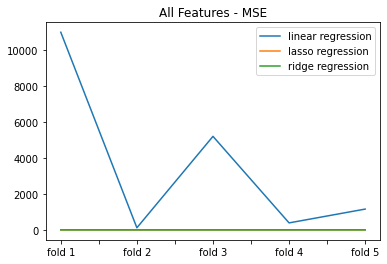

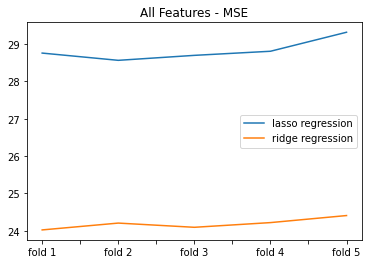

In [ ]:
fold = pd.read_csv(path+'reuslt_cv_5.csv')
cs = []
for c in fold.columns:
    if 'MSE_fold' in c:
        cs.append(c)
t = fold.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,6)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv5_mse_3.jpg')
plt.show()

t[['lasso regression', 'ridge regression']].plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv5_mse_2.jpg')
plt.show()



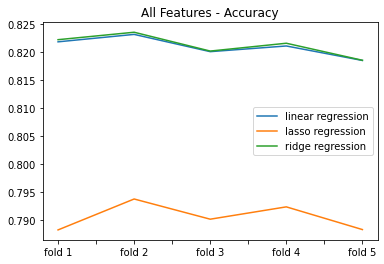

In [ ]:

cs = []
for c in fold.columns:
    if 'Accuracy_fold' in c:
        cs.append(c)
t = fold.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,6)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - Accuracy')
plt.savefig(path+'cv5_accuracy_3.jpg')
plt.show()


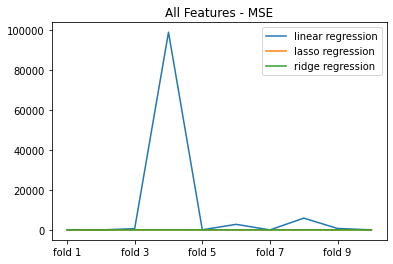

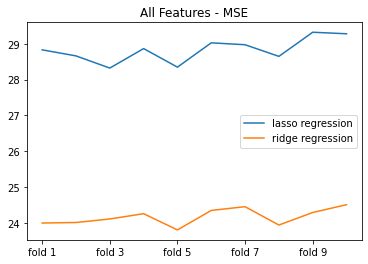

In [ ]:

fold = pd.read_csv(path+'reuslt_cv_10.csv')
cs = []
for c in fold.columns:
    if 'MSE_fold' in c:
        cs.append(c)
t = fold.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,11)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv10_mse_3.jpg')
plt.show()

t[['lasso regression', 'ridge regression']].plot()
plt.title('All Features - MSE')
plt.savefig(path+'cv10_mse_2.jpg')
plt.show()



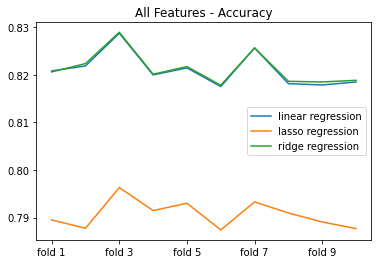

In [ ]:

cs = []
for c in fold.columns:
    if 'Accuracy_fold' in c:
        cs.append(c)
t = fold.tail(3)[cs]
t.columns = ['fold {}'.format(i) for i in range(1,11)]
t = t.T
t.columns = ['linear regression', 'lasso regression', 'ridge regression']
t.plot()
plt.title('All Features - Accuracy')
plt.savefig(path+'cv10_accuracy_3.jpg')
plt.show()